In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
import math 
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
#%matplotlib tk


In [2]:
# The Simulaltion is performed for a Draft deal and data is obtained from the FM Converge Draft of the option
# The trade deal is USDJPY with the following setup
#Strike_price = 108.1035
#Spot_price = 108.1035
Strike_price = 100
Spot_price = 100
Volatility = 6.4/100
r_d = 0.12297945/100
r_f = 0.4487502/100
T_expiry = 90
Premium = 10 # Assumed Value 
# Spread Strike definition 
lower_strike = 0.8 * Strike_price
upper_strike = 1.2 * Strike_price
range_spot = (np.arange(200)/100)*Strike_price;

In [3]:
def call_option(strike):
    # Call option 
    Call_option = np.minimum(range_spot,strike)
    payoff_call_option = range_spot - Call_option
    return payoff_call_option
def put_option(strike):
    # put option 
    put_option = np.maximum(range_spot,strike)
    payoff_put_option = put_option - range_spot 
    return payoff_put_option
def plot_option(option,premium=0,title=None):
    #plt.figure()
    plt.plot(range_spot,option-premium)
    zero_line = np.zeros(200)
    plt.plot(Strike_price, option[100]-premium,'r*')
    plt.plot(range_spot,zero_line,'r-')
    plt.title(title)

In [4]:
def BSModel_call(time,spot,strike,volatility,rd,rf):
    S = spot
    K = strike
    T = time 
    sigma = volatility
    f = S * math.exp((rd-rf)*T)
    d1 = (np.log(f/K) + ((sigma**2)*T)/2)/(sigma * (T**0.5))
    d2 = d1 - sigma * (T**(0.5))
    execute_val = S*norm.cdf(d1)
    future_val = K*norm.cdf(d2)
    val = execute_val - future_val 
    current_val = math.exp(-1*rd*T)*val
    return current_val
def BSModel_put(time,spot,strike,volatility,rd,rf):
    S = spot
    K = strike
    T = time 
    sigma = volatility
    f = S * math.exp((rd-rf)*T)
    d1 = (np.log(f/K) + ((sigma**2)*T)/2)/(sigma * (T**0.5))
    d2 = d1 - sigma * (T**(0.5))
    execute_val = S*(norm.cdf(d1)-1)
    future_val = K*(norm.cdf(d2)-1)
    val = execute_val - future_val 
    current_val = math.exp(-1*rd*T)*val
    return current_val


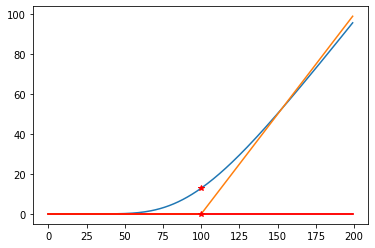

In [5]:
BS_payoff_call = np.zeros(200)
T_maturity = 30
for i in range(1,200):
    BS_payoff_call[i] = BSModel_call(T_maturity,range_spot[i],Strike_price,Volatility,r_d,r_f)
plot_option(BS_payoff_call)
plot_option(call_option(Strike_price))

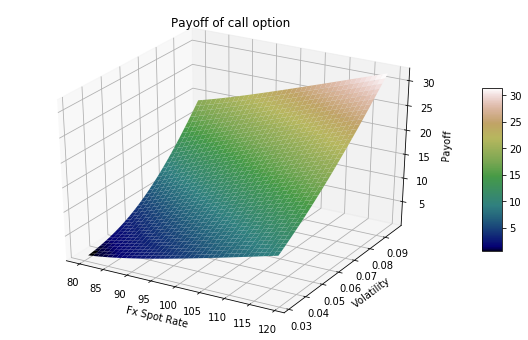

In [6]:
# Assuming final spot to vary between 80% to 120 % of the strike
range_final_spot = (np.arange(80,120)/100)*Strike_price
range_volatility = (np.linspace(50,150,40)/100)*Volatility
grid_x = range_final_spot.shape[0]
grid_y = range_volatility.shape[0]
payoff_3d = np.zeros((grid_x,grid_y))
for i in range(grid_x):
    for j in range(grid_y):
        payoff_3d[i,j] = BSModel_call(T_maturity,range_final_spot[i],Strike_price,range_volatility[j],r_d,r_f)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
ax.set_title('Payoff of call option')
X,Y = np.meshgrid(range_final_spot,range_volatility)
surf = ax.plot_surface(X,Y,payoff_3d, cmap=mycmap)
ax.set_xlabel('Fx Spot Rate')
ax.set_ylabel('Volatility')
ax.set_zlabel('Payoff')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=8)

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


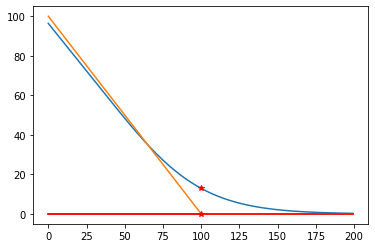

In [8]:
BS_payoff_put = np.zeros(200)
T_maturity = 30
for i in range(200):
    BS_payoff_put[i] = BSModel_put(T_maturity,range_spot[i],Strike_price,Volatility,r_d,r_f)
plot_option(BS_payoff_put)
plot_option(put_option(Strike_price))

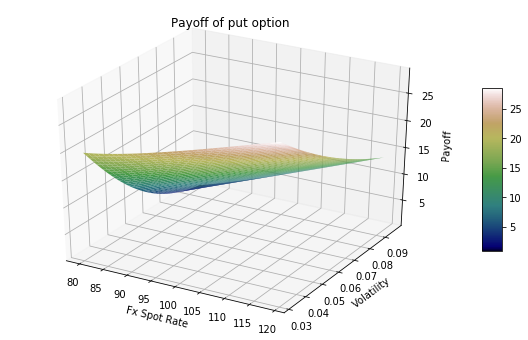

In [9]:
# Assuming final spot to vary between 80% to 120 % of the strike
range_final_spot = (np.arange(80,120)/100)*Strike_price
range_volatility = (np.linspace(50,150,40)/100)*Volatility
grid_x = range_final_spot.shape[0]
grid_y = range_volatility.shape[0]
payoff_3d = np.zeros((grid_x,grid_y))
for i in range(grid_x):
    for j in range(grid_y):
        payoff_3d[i,j] = BSModel_put(T_maturity,range_final_spot[i],Strike_price,range_volatility[j],r_d,r_f)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
mycmap = plt.get_cmap('gist_earth')
ax.set_title('Payoff of put option')
X,Y = np.meshgrid(range_final_spot,range_volatility)
surf = ax.plot_surface(X,Y,payoff_3d, cmap=mycmap)
ax.set_xlabel('Fx Spot Rate')
ax.set_ylabel('Volatility')
ax.set_zlabel('Payoff')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=8)